# Introduction

In this Notebook, we will quickly explore the content of our table. It's gonna be again a small Notebook but this is good to check

# Load data

First we can load the table in a pandas dataframe easily

In [8]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [9]:
conn = sqlite3.connect('F:/data/birthday.db')
df = pd.read_sql_query("SELECT * FROM birthday", conn)
conn.close()
df.head()

,birthday,name,twitter,url,country,dead
0,1985-01-01,Céline Bosquet,,https://anniversaire-celebrite.com/celine-bosq...,France,0
1,1983-01-01,Corinne Coman,@CorinneComan,https://anniversaire-celebrite.com/corinne-com...,France,0
2,1981-01-01,Marjolaine Bui,,https://anniversaire-celebrite.com/marjolaine-...,France,0
3,1980-01-01,Olivia Ruiz,@OliviaRuiz,https://anniversaire-celebrite.com/olivia-ruiz...,France,0
4,1973-01-01,DJ Shadow,@djshadow,https://anniversaire-celebrite.com/dj-shadow-c...,États-Unis,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6008 entries, 0 to 6007
Data columns (total 6 columns):
birthday    6008 non-null object
name        6008 non-null object
twitter     6008 non-null object
url         6008 non-null object
country     6008 non-null object
dead        6008 non-null int64
dtypes: int64(1), object(5)
memory usage: 281.7+ KB


# Visualization

In term of visual it would be great to know which country I have the more informations and the ratio of account with or without twitter account

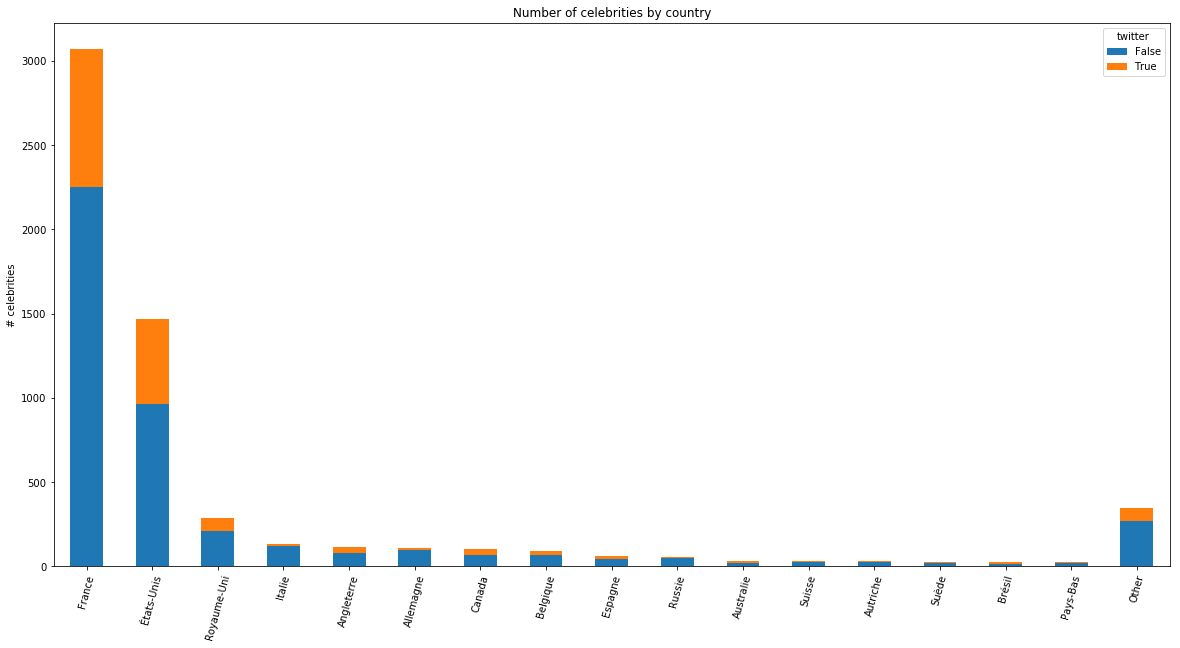

In [12]:
df_temp = df.copy()
df_temp["twitter"] = df_temp["twitter"] != ""
df2 = df_temp.groupby(['country', 'twitter'])['name'].count().unstack('twitter').fillna(0)
df2["sum"] = df2.sum(axis=1)
mask = df2["sum"] >= 20

top = df2[mask]
top = top.sort_values("sum", ascending=False)

bottom = df2[~mask].sum(axis=0).to_frame().transpose()
bottom["twitter"] = "Other"
bottom = bottom.set_index("twitter")

final = top.append(bottom)
final = final.drop("sum", axis= 1)

fig, ax = plt.subplots(figsize=(20,10))

final.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel("# celebrities")

plt.title("Number of celebrities by country")

plt.xticks(rotation=75)
plt.show()

We can also check the balance of account where we have a twitter globally, the ratio of dead people compare to alive and finally the number of account alive and having twitter.

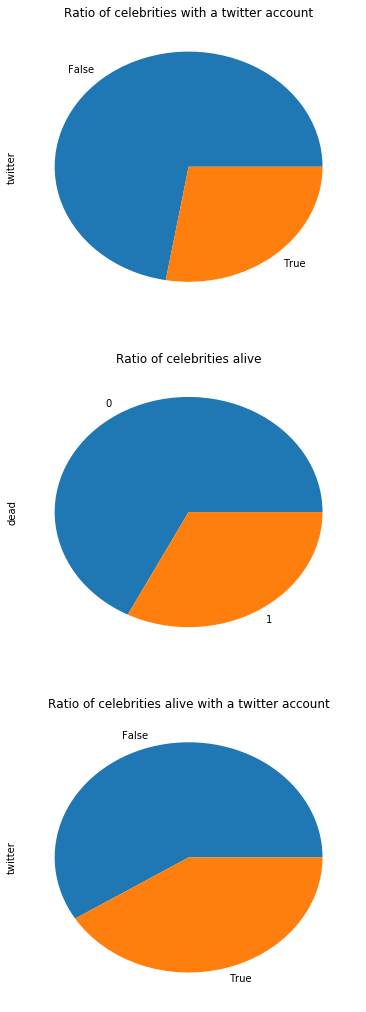

In [14]:
count2 = (df["twitter"] != "").value_counts()
count3 = df["dead"].value_counts()
count4 = (df[df["dead"] == 0]["twitter"] != "").value_counts()

fig, axes = plt.subplots(3, 1, figsize=(6,18))

count2.plot.pie(ax=axes[0])
count3.plot.pie(ax=axes[1])
count4.plot.pie(ax=axes[2])

axes[0].set_title("Ratio of celebrities with a twitter account")
axes[1].set_title("Ratio of celebrities alive")
axes[2].set_title("Ratio of celebrities alive with a twitter account")
plt.show()

Not so bad, we have around 40% of account with a twitter account.
We can also check the age of celebrities we have :

In [16]:
year_df = df[df.dead == 0].birthday.str[:4].value_counts().to_frame().reset_index()
year_df.columns = ["year", "count"]
year_df = year_df.sort_values("year")

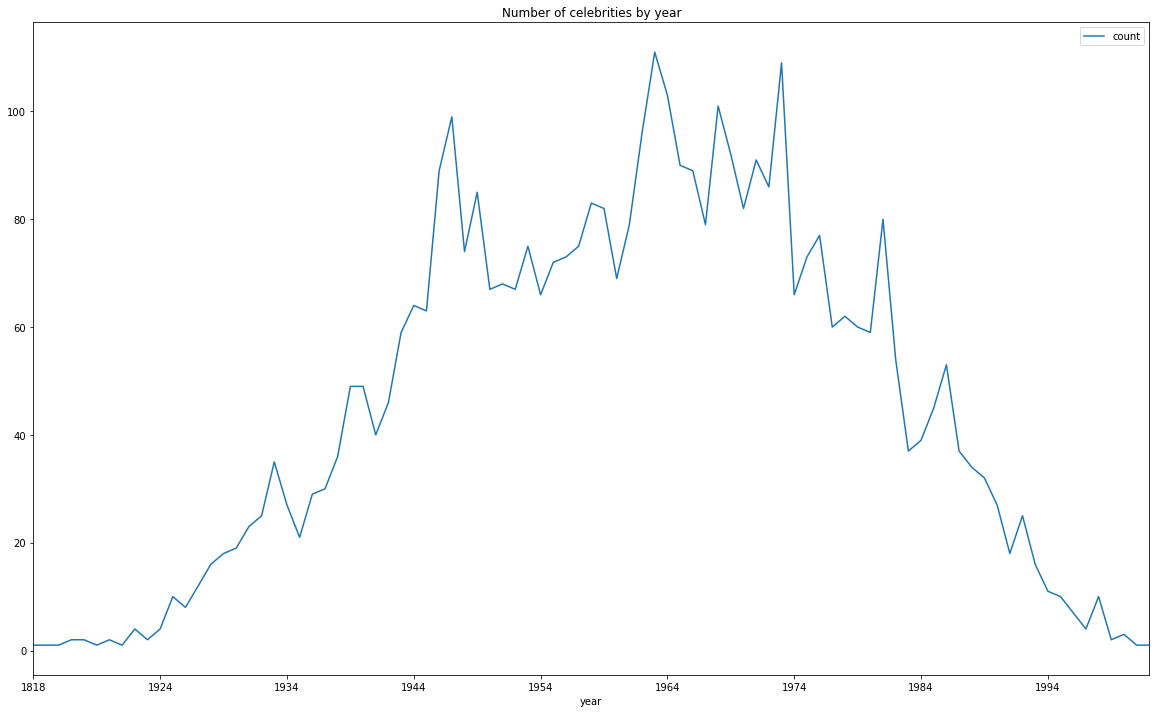

In [20]:
fig, ax = plt.subplots(figsize=(20,12))
year_df.plot(x="year", y="count", kind='line', ax=ax)
plt.title("Number of celebrities by year")
plt.show()

We can also count the number of persons by date as a simple matrix plot :

In [198]:
sub_df = df[df.dead == 0].birthday
sub_df = sub_df[~sub_df.str.contains("00-00")]
X = np.zeros(shape = (12, 31), dtype=np.uint8)
dates = sub_df.tolist()
for date in dates:
    year, month, day = [int(x) for x in date.split("-")]
    X[month-1, day-1] += 1

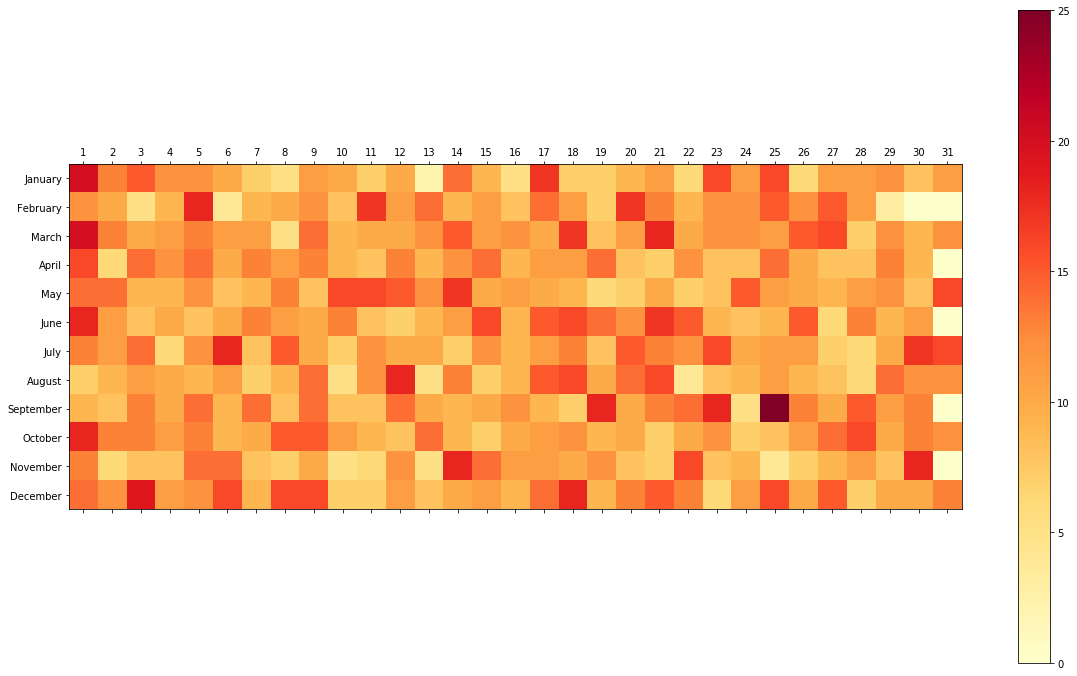

In [221]:
fig, ax = plt.subplots(figsize=(20,12))
cax = ax.matshow(X, cmap="YlOrRd")
ax.set_xticks(list(range(0, 31)))
ax.set_xticklabels(list(range(1, 32)))
ax.set_yticks(list(range(12)))
ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.colorbar(cax)
plt.show()

# Missing

This part is only a manual check used to fill the database on the previous notebook

In [6]:
df[df.twitter == "@WespiserD"]

,birthday,name,twitter,url,country,dead
41,1992-01-03,Delphine Wespiser,@WespiserD,https://anniversaire-celebrite.com/delphine-we...,France,0


In [7]:
df[df.name == "Willy Rovelli"]

,birthday,name,twitter,url,country,dead
42,1980-01-03,Willy Rovelli,@Willy_Rovelli,https://anniversaire-celebrite.com/willy-rovel...,France,0


In [31]:
i = 1300
df[(df.twitter == "") & (df.country == "France") & (df.dead == 0)].iloc[i:i+50]

,birthday,name,twitter,url,country,dead
5849,1948-12-24,Edwige Fenech,,https://anniversaire-celebrite.com/edwige-fene...,France,0
5851,1938-12-24,Philippe Nahon,,https://anniversaire-celebrite.com/philippe-na...,France,0
5862,1992-12-25,Anthony Sonigo,,https://anniversaire-celebrite.com/anthony-son...,France,0
5866,1968-12-25,Carole Rousseau,,https://anniversaire-celebrite.com/carole-rous...,France,0
5869,1961-12-25,Íngrid Betancourt,,https://anniversaire-celebrite.com/ingrid-beta...,France,0
5874,1948-12-25,Noël Mamère,,https://anniversaire-celebrite.com/noel-mamere...,France,0
5875,1948-12-25,Bernard Alane,,https://anniversaire-celebrite.com/bernard-ala...,France,0
5876,1933-12-25,François de Closets,,https://anniversaire-celebrite.com/francois-de...,France,0
5877,1931-12-25,Simone Garnier,,https://anniversaire-celebrite.com/simone-garn...,France,0
5882,1986-12-26,Hugo Lloris,,https://anniversaire-celebrite.com/hugo-lloris...,France,0


# Conclusion

In this last notebook, we just explore quickly the content of the BD. We can now validate the fact that we restrict wishes to France as we have a huge majority in France. I could try to scrp other website for USA for example but this will be a future update if I like to maintain it.